# Lec 10.1 Predator Prey Modeling

See original here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html


##  Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (say rabbits), $y$ is the number of predators (say foxes). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Equation for prey

$dx/dt = \alpha x - \beta x y $

The prey are supposed to have unlimited supply of food and $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is 
assumed to be proportional to the rate at which predator and prey meet and is given by $ \beta y x$

2.Equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predators, $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term
$\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### Numerical solution using Python

A simple python code for solving these equations is shown below.

In [1]:
# importrequired libraries
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [3]:
#define the time stepping scheme - euler forward, as used in earlier lessons
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [4]:
# define the function that represents the Lotka-Volterra equations
def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return numpy.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

In [5]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps
x0 = 10.
y0 = 2.
t0 = 0.

# set initial conditions
u_euler = numpy.empty((N, 2))

# initialize the array containing the solution for each time-step
u_euler[0] = numpy.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [46]:
time = numpy.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

We will now plot the variation of population for each species with time.

Text(0.5, 1.0, 'predator prey model')

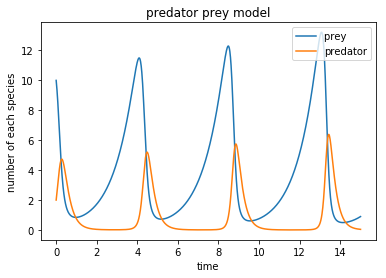

In [7]:
plt.plot(time, x_euler, label = 'prey ')
plt.plot(time, y_euler, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

## System behaviour

A better understanding of the system behaviour can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

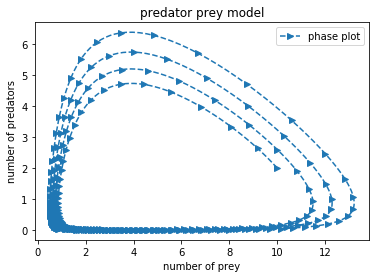

In [8]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

## E.1 
Plot the fixed point (steady populations) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot.

In [11]:
Yss=alpha/beta
Xss=gamma/beta

In [ ]:
time = numpy.linspace(0.0, T,N)


Text(0.5, 1.0, 'predator prey model')

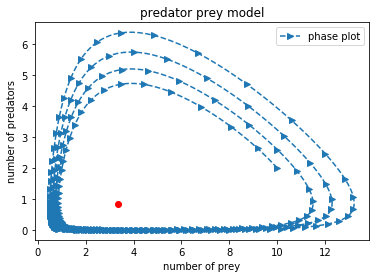

In [41]:
plt.plot(Xss,Yss, 'ro')
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

The red point represnets the numbers of prey and predators in the population when it is in a Steady State. In this state, the population size is not changing.

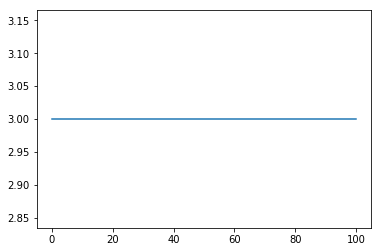

In [23]:
plt.plot([0,100],[3,3])

Text(0.5, 1.0, 'predator prey model')

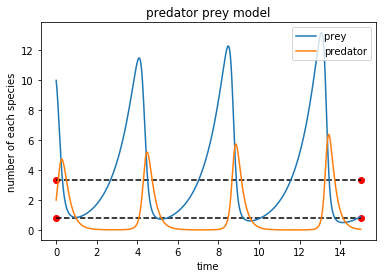

In [39]:
#Prey Steady State
plt.plot([time[0],time[-1]],[Xss,Xss],'ro') 
plt.plot([time[0],time[-1]],[Xss,Xss],'k--')
#Predator Steady State
plt.plot([time[0],time[-1]],[Yss,Yss],'ro') 
plt.plot([time[0],time[-1]],[Yss,Yss],'k--')

plt.plot(time, x_euler, label = 'prey ')
plt.plot(time, y_euler, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [42]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps
x0 = Xss
y0 = Yss
t0 = 0.

# set initial conditions
u_euler = numpy.empty((N, 2))

# initialize the array containing the solution for each time-step
u_euler[0] = numpy.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [43]:
time = numpy.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

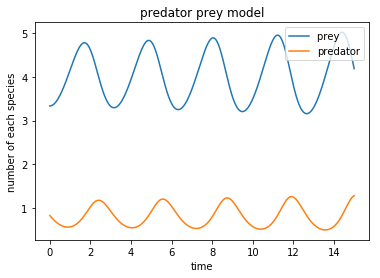

In [44]:
plt.plot(time, x_euler, label = 'prey ')
plt.plot(time, y_euler, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

## E.2 
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots.

In [45]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

## Another time stepping method with higher order of accuracy

## E.3
Do the same exercise with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ?

In [47]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

In [48]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps
x0 = 10.
y0 = 2.
t0 = 0.

# set initial conditions
u_RK4 = numpy.empty((N, 2))

# initialize the array containing the solution for each time-step
u_RK4[0] = numpy.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    
    u_RK4[n+1] = RK4(u_RK4[n], f, dt)

In [ ]:
time = numpy.linspace(0.0, T,N)
x_RK4 = u_euler[:,0]
y_RK4 = u_euler[:,1]

In [ ]:
plt.plot(time, x_euler, label = 'prey ')
plt.plot(time, y_euler, label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

## E.4 (Advanced)
Modify the differential equations to include other types of interactions. See advanced predator prey example at the top for ideas. Or do the zombie apocalypse example